In [43]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from sklearn.neighbors import KNeighborsClassifier

In [2]:
column_types = {   
    'converted_x': 'float64',
    'converted_y': 'float64',
    }

optimized_df = pd.read_csv('combined_stats.csv', low_memory=False)

In [3]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

print(f"Total Memory Usage on the new dataFrame :{mem_usage(optimized_df)}")

Total Memory Usage on the new dataFrame :1175.68 MB


In [4]:
optimized_df.columns
test_df = optimized_df[['player_uid', 'converted_x', 'converted_y', 'result']]
test_df.head()

,player_uid,converted_x,converted_y,result
0,NaN,NaN,NaN,NaN
1,342107.0,NaN,NaN,NaN
2,410587.0,25.1,15,made
3,976411.0,23.2,88.6,missed
4,178457.0,NaN,NaN,NaN


In [5]:
test_df = test_df.dropna(subset=['result'])
test_df.head(25)
#test_df.count()
#test_df.shape

,player_uid,converted_x,converted_y,result
2,410587.0,25.1,15,made
3,976411.0,23.2,88.6,missed
5,805781.0,46.4,18.8,missed
7,342107.0,11.9,80.7,missed
9,221454.0,24,7.3,missed
11,178457.0,20.3,24,made
13,342107.0,NaN,NaN,made
14,344172.0,46.7,83.4,made
17,791006.0,13.3,85.5,made
18,184660.0,26.1,5.6,missed


In [6]:
values = {'converted_x': 25.0, 'converted_y':15.0}
test_df = test_df.fillna(value=values)

convertedtest_df = test_df
convertedtest_df['result'] = test_df['result'].map({'made': 1, 'missed': 0})
convertedtest_df.head(25)

,player_uid,converted_x,converted_y,result
2,410587.0,25.1,15,1
3,976411.0,23.2,88.6,0
5,805781.0,46.4,18.8,0
7,342107.0,11.9,80.7,0
9,221454.0,24,7.3,0
11,178457.0,20.3,24,1
13,342107.0,25,15,1
14,344172.0,46.7,83.4,1
17,791006.0,13.3,85.5,1
18,184660.0,26.1,5.6,0


In [29]:
newtest_df = convertedtest_df[convertedtest_df.converted_x != 'unknown']
len(newtest_df)

282463

In [31]:
newtest_df['converted_y'].unique()

array(['15', '88.6', '18.8', '80.7', '7.3', '24', 15.0, '83.4', '85.5',
       '5.6', '87.9', '14.1', '64.5', '8.1', '87.5', '17.1', '6.6',
       '63.2', '27.2', '19.1', '6.3', '74.7', '74', '9.4', '72.8', '19.2',
       '88.4', '28.7', '64.7', '7.2', '4.4', '6', '88.9', '25.2', '79.8',
       '6.7', '86.3', '27.1', '89', '25', '84', '7.1', '82.7', '15.5',
       '13.5', '82.1', '29.8', '87.3', '77.5', '17.8', '89.1', '28.3',
       '88.2', '23.3', '88.1', '21.5', '24.9', '88.5', '6.5', '6.2',
       '4.7', '89.6', '16.5', '82.9', '66.5', '27', '85.2', '27.7',
       '82.2', '29.2', '88.7', '12.3', '64.2', '87.6', '16.7', '71.6',
       '19.6', '85.8', '14', '65.6', '20.7', '13.3', '86.1', '77.7',
       '86.9', '76', '64.6', '5.8', '7', '74.4', '15.3', '30.5', '78.5',
       '89.9', '20.6', '88', '17.7', '84.7', '70.5', '5.4', '88.3', '13',
       '17.9', '23.4', '64.8', '17', '87.2', '8.7', '84.8', '5.5', '74.6',
       '62.8', '29.5', '86.4', '13.2', '87.8', '79.4', '18.5', '78',
 

In [32]:
y = newtest_df['result']
X = newtest_df[["player_uid", "converted_x", "converted_y"]]

newtest_df.ftypes
#print(X.shape,y.shape)

player_uid     float64:dense
converted_x     object:dense
converted_y     object:dense
result           int64:dense
dtype: object

In [33]:
from sklearn.model_selection import train_test_split

#y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
y_trainArray = np.array(y_train).reshape(-1,1)
print(X_train.shape, y_trainArray.shape)

(211847, 3) (211847, 1)


In [40]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_trainArray)

C:\Users\Melissa\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Melissa\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [41]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\Melissa\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\Melissa\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  


C:\Users\Melissa\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 9, Train/Test Score: 0.694/0.616


C:\Users\Melissa\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 11, Train/Test Score: 0.687/0.619


C:\Users\Melissa\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 13, Train/Test Score: 0.682/0.624


C:\Users\Melissa\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 15, Train/Test Score: 0.678/0.627


C:\Users\Melissa\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 17, Train/Test Score: 0.676/0.630


C:\Users\Melissa\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 19, Train/Test Score: 0.673/0.633


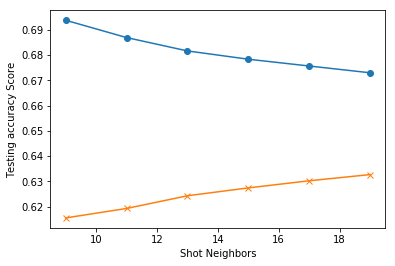

In [53]:
train_scores = []
test_scores = []

for shot in range(9, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=shot)
    knn.fit(X_train_scaled, y_trainArray)
    train_score = knn.score(X_train_scaled, y_trainArray)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {shot}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


plt.plot(range(9, 20, 2), train_scores, marker='o')
plt.plot(range(9, 20, 2), test_scores, marker="x")
plt.xlabel("Shot Neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


In [64]:
newtest_df.groupby('player_uid').count().sort_values("result", ascending = True)


,converted_x,converted_y,result
player_uid,,,
799114.0,1,1,1
204918.0,1,1,1
249467.0,1,1,1
372122.0,1,1,1
852587.0,1,1,1
444654.0,1,1,1
730425.0,1,1,1
441116.0,1,1,1
537297.0,2,2,2
